# Choice Modeling: Conjoint Analysis

A marketing manager faces a common problem—how do customers evaluate various tangible or intangible attributes offered by a particular product(ex TV)? Now, he or she will have to make a judgement about his preference for various attribute combinations such as brand image, flat screen, screen size, sound quality, picture quality, price of different models, and so on. Conjoint analysis provides an answer to this question. The main objective of conjoint analysis is to find out the attributes of the product that a respondent prefers most.
<br>
<br>
Conjoint analysis determines the relative importance of various product attributes (attached by the consumers to different product attributes) and values (utilities) attached to different levels of these attributes.
<br> <br>
In fact, conjoint analysis asks the participants to give an overall evaluation of the product that vary systematically on a number of attributes.
<br> <br>
To formulate a problem, as a first step, a researcher must identify the various attributes and attribute levels.


![](docs/cjoint.PNG)

The conjoint analysis model can be represented by the following formula:


![](docs/cjoinform.PNG)

where U(x) is the utility of an alternative, uij the part-worth contribution (utility of jth level of ith attribute), ki the number of levels for attribute i, and m the number of attributes. xij = 1 if the jth level of the ith attribute is present and xij = 0 otherwise.
<br> <br>
Importance of an attribute (Ri) = [maximum(uij) − minimum(uij)]
<br> 

To estimate the model, a variety of techniques are available. The most popular and widely applied technique is dummy variable regression technique. To analyse the conjoint analysis data, dummy variables are treated as independent or explanatory variables and preference rating obtained from the respondent is treated as dependent variable.

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/2445996?format=tab&gbrecs=true', delimiter='\t')

In [5]:
df.head()

,resID,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale,selected,rating
0,383,1,6,3,6,6,1,6,2,0,0.333333
1,383,2,1,1,4,3,6,4,1,1,0.500000
2,383,1,3,5,5,1,2,5,2,1,0.666667
3,383,2,4,5,3,2,1,6,1,0,0.666667
4,383,2,1,2,3,6,2,2,2,0,0.333333


In [6]:
df.describe()

,resID,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale,selected,rating
count,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3456.000000
mean,455.171379,1.498846,3.488748,3.581939,3.491633,3.496249,3.488459,3.502597,1.493653,0.500000,0.509838
std,252.867078,0.500071,1.712703,1.729235,1.701392,1.705136,1.700355,1.716945,0.500032,0.500072,0.246864
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,238.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.333333
50%,453.000000,1.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,0.500000,0.500000
75%,669.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,1.000000,0.666667
max,900.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,1.000000,1.000000


In [40]:
32/8

4.0

In [7]:
df.atmilitary.value_counts()

1    1737
2    1729
Name: atmilitary, dtype: int64

In [8]:
df.atreligion.value_counts()

1    590
3    588
6    580
2    571
4    569
5    568
Name: atreligion, dtype: int64

In [9]:
df.ated.value_counts()

6    640
4    598
5    588
1    574
3    537
2    529
Name: ated, dtype: int64

In [10]:
df.atprof.value_counts()

3    603
4    591
1    580
6    575
2    562
5    555
Name: atprof, dtype: int64

In [11]:
df.atinc.value_counts()

3    617
1    598
5    591
4    569
6    564
2    527
Name: atinc, dtype: int64

In [12]:
df.atrace.value_counts()

3    617
5    591
2    577
1    573
6    563
4    545
Name: atrace, dtype: int64

In [13]:
df.atage.value_counts()

1    601
3    595
5    592
6    580
4    559
2    539
Name: atage, dtype: int64

In [14]:
df.atmale.value_counts()

1    1755
2    1711
Name: atmale, dtype: int64

In [15]:
df.shape

(3466, 11)

In [16]:
df.isnull().sum()

resID          0
atmilitary     0
atreligion     0
ated           0
atprof         0
atinc          0
atrace         0
atage          0
atmale         0
selected       0
rating        10
dtype: int64

In [17]:
# remove empty data
clean_df = df.dropna()

In [18]:
y = clean_df['selected']
x = clean_df[[x for x in df.columns if x != 'selected' and x != 'resID' and x != 'rating']]

In [19]:
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'selected'])
xdum.head()

,atmilitary_1,atmilitary_2,atreligion_1,atreligion_2,atreligion_3,atreligion_4,atreligion_5,atreligion_6,ated_1,ated_2,...,atrace_5,atrace_6,atage_1,atage_2,atage_3,atage_4,atage_5,atage_6,atmale_1,atmale_2
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [26]:
res = sm.OLS(y, xdum, family=sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               selected   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     10.72
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           7.39e-51
Time:                        14:20:09   Log-Likelihood:                -2343.3
No. Observations:                3456   AIC:                             4753.
Df Residuals:                    3423   BIC:                             4956.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
atmilitary_1     0.0808      0.008      9.585      0.000       0.064       0.097
atmilitary_2     0.1671      0.008     19.810      0.000       0.151       0.184
atreligion_1     0.0931      0.018      5.132      0.000       0.058       0.129
atreligion_2     0.0578      0.018      3.144      0.002       0.022       0.094
atreligion_3     0.0803      0.018      4.411      0.000       0.045       0.116
atreligion_4     0.0797      0.018      4.326      0.000       0.044       0.116
atreligion_5    -0.0218      0.018     -1.185      0.236      -0.058       0.014
atreligion_6    -0.0411      0.018     -2.256      0.024      -0.077      -0.005
ated_1          -0.1124      0.018     -6.115      0.000      -0.148      -0.076
ated_2           0.0278      0.019      1.464      0.143      -0.009       0.065
ated_3           0.0366      0.019      1.942      0.052      -0.000       0.074
ated_4           0.0737      0.018      4.076      0.000       0.038       0.109
ated_5           0.0649      0.018      3.570      0.000       0.029       0.101
ated_6           0.1572      0.018      8.949      0.000       0.123       0.192
atprof_1         0.1084      0.018      5.930      0.000       0.073       0.144
atprof_2         0.0852      0.019      4.597      0.000       0.049       0.122
atprof_3         0.0910      0.018      5.060      0.000       0.056       0.126
atprof_4         0.0674      0.018      3.716      0.000       0.032       0.103
atprof_5         0.0145      0.019      0.779      0.436      -0.022       0.051
atprof_6        -0.1186      0.018     -6.465      0.000      -0.155      -0.083
atinc_1          0.0081      0.018      0.448      0.654      -0.027       0.043
atinc_2          0.0316      0.019      1.662      0.097      -0.006       0.069
atinc_3          0.0716      0.018      4.020      0.000       0.037       0.106
atinc_4          0.0397      0.018      2.154      0.031       0.004       0.076
atinc_5          0.0808      0.018      4.451      0.000       0.045       0.116
atinc_6          0.0161      0.018      0.872      0.383      -0.020       0.052
atrace_1         0.0274      0.018      1.494      0.135      -0.009       0.063
atrace_2         0.0527      0.018      2.881      0.004       0.017       0.089
atrace_3         0.0633      0.018      3.556      0.000       0.028       0.098
atrace_4         0.0037      0.019      0.198      0.843      -0.033       0.040
atrace_5         0.0324      0.018      1.787      0.074      -0.003       0.068
atrace_6         0.0683      0.019      3.687      0.000       0.032       0.105
atage_1          0.0680      0.018      3.770      0.000       0.033       0.103
atage_2          0.0934      0.019      4.957      0.000       0.056       0.130
atage_3          0.0900      0.018      4.967      0.000       0.054       0.125
atage

In [27]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})

In [28]:
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

In [29]:
df_res.head()

,param_name,param_w,pval,abs_param_w,is_sig_95,c
atmilitary_1,atmilitary_1,0.080778,1.711435e-21,0.080778,True,blue
atmilitary_2,atmilitary_2,0.167102,9.017199e-83,0.167102,True,blue
atreligion_1,atreligion_1,0.093108,3.028118e-07,0.093108,True,blue
atreligion_2,atreligion_2,0.057763,1.682251e-03,0.057763,True,blue
atreligion_3,atreligion_3,0.080263,1.061895e-05,0.080263,True,blue


In [30]:
# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

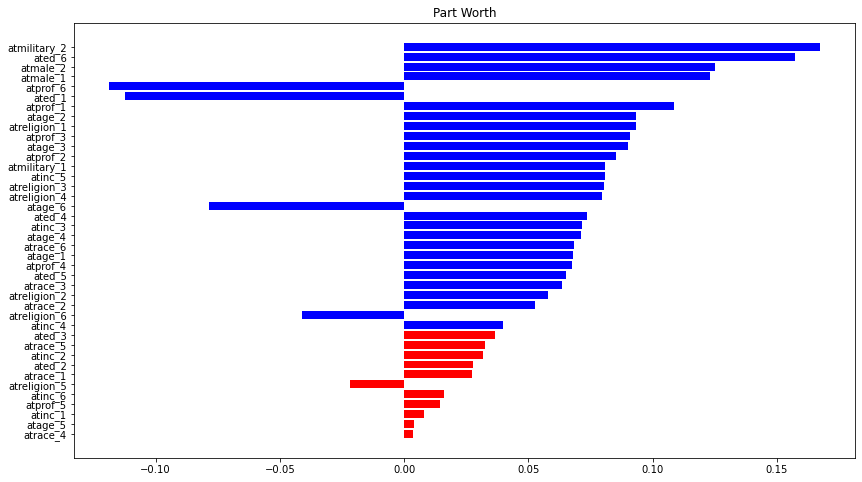

In [31]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [32]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

In [36]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

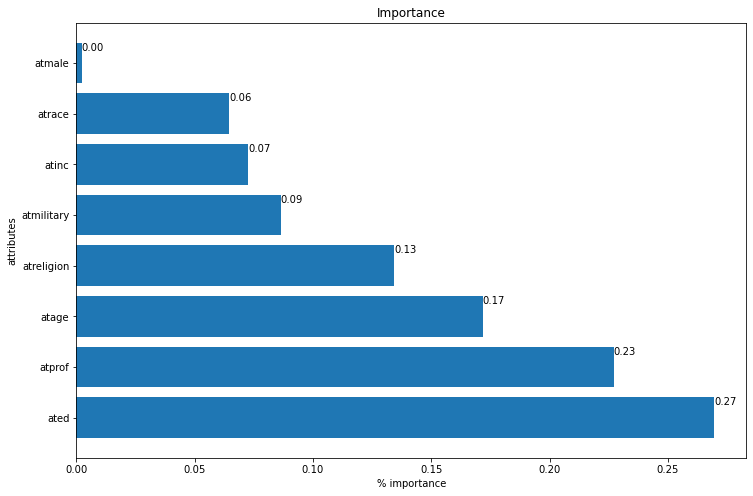

In [37]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()